# Thử thay thế giá trị 0 bằng mean
https://www.youtube.com/watch?v=HU3H46dS6i0&list=PLGL1vv2-0DXtt5qR_MxinlWfYOKICpK7N&index=2

Phát hiện ra: GridSearch không tìm ra được tham số tối ưu do cross validation lấy trung bình các đánh gía

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [141]:
df = pd.read_csv('diabetes2.csv')

In [142]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [146]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [147]:
df_copy = df.copy(deep= True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

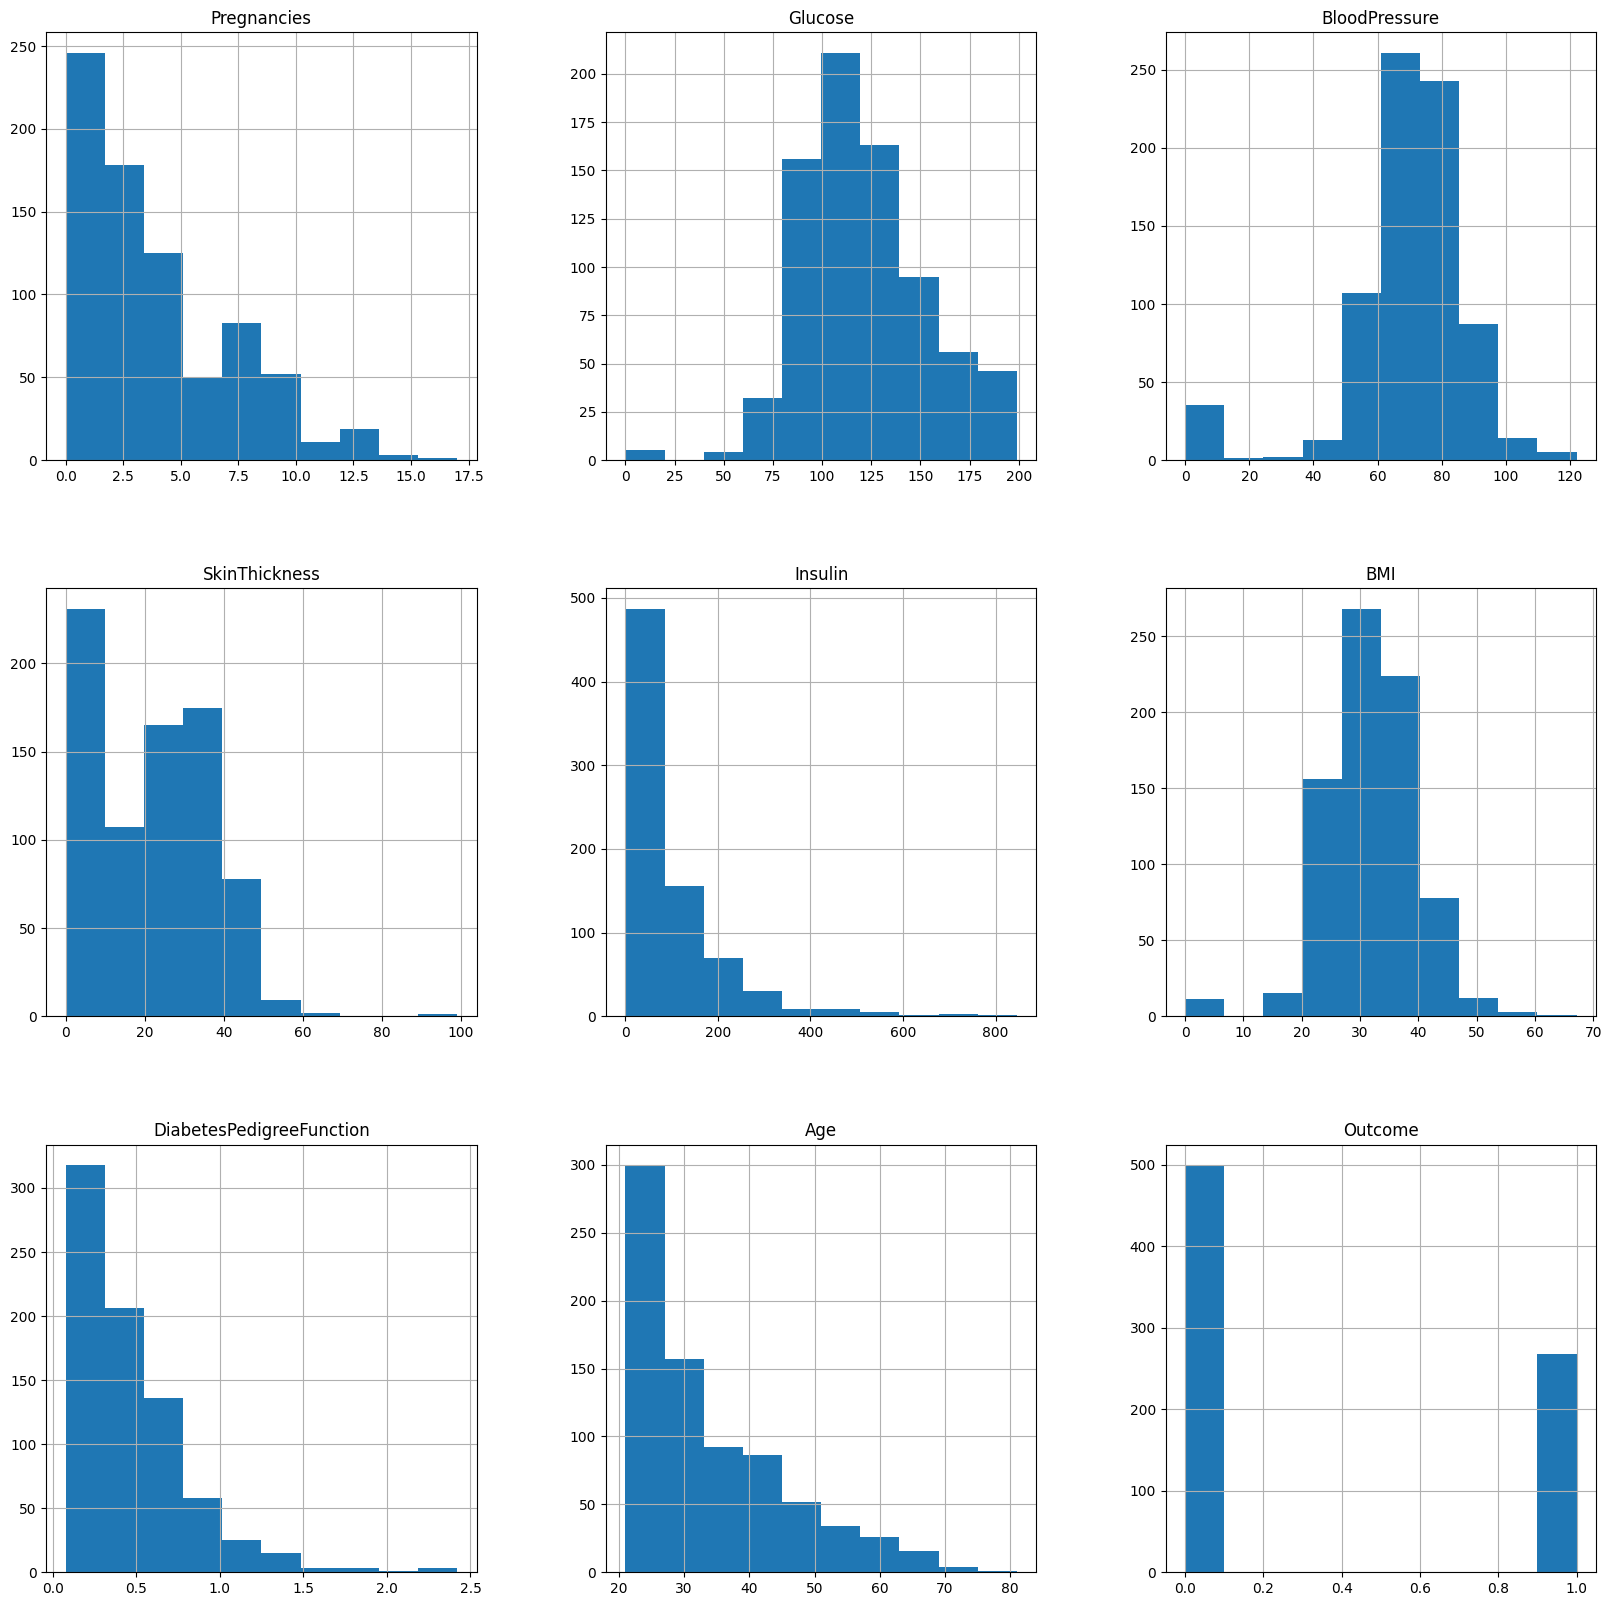

In [148]:
df.hist(figsize= (20,20))

In [149]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace= True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace= True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace= True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace= True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace= True)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

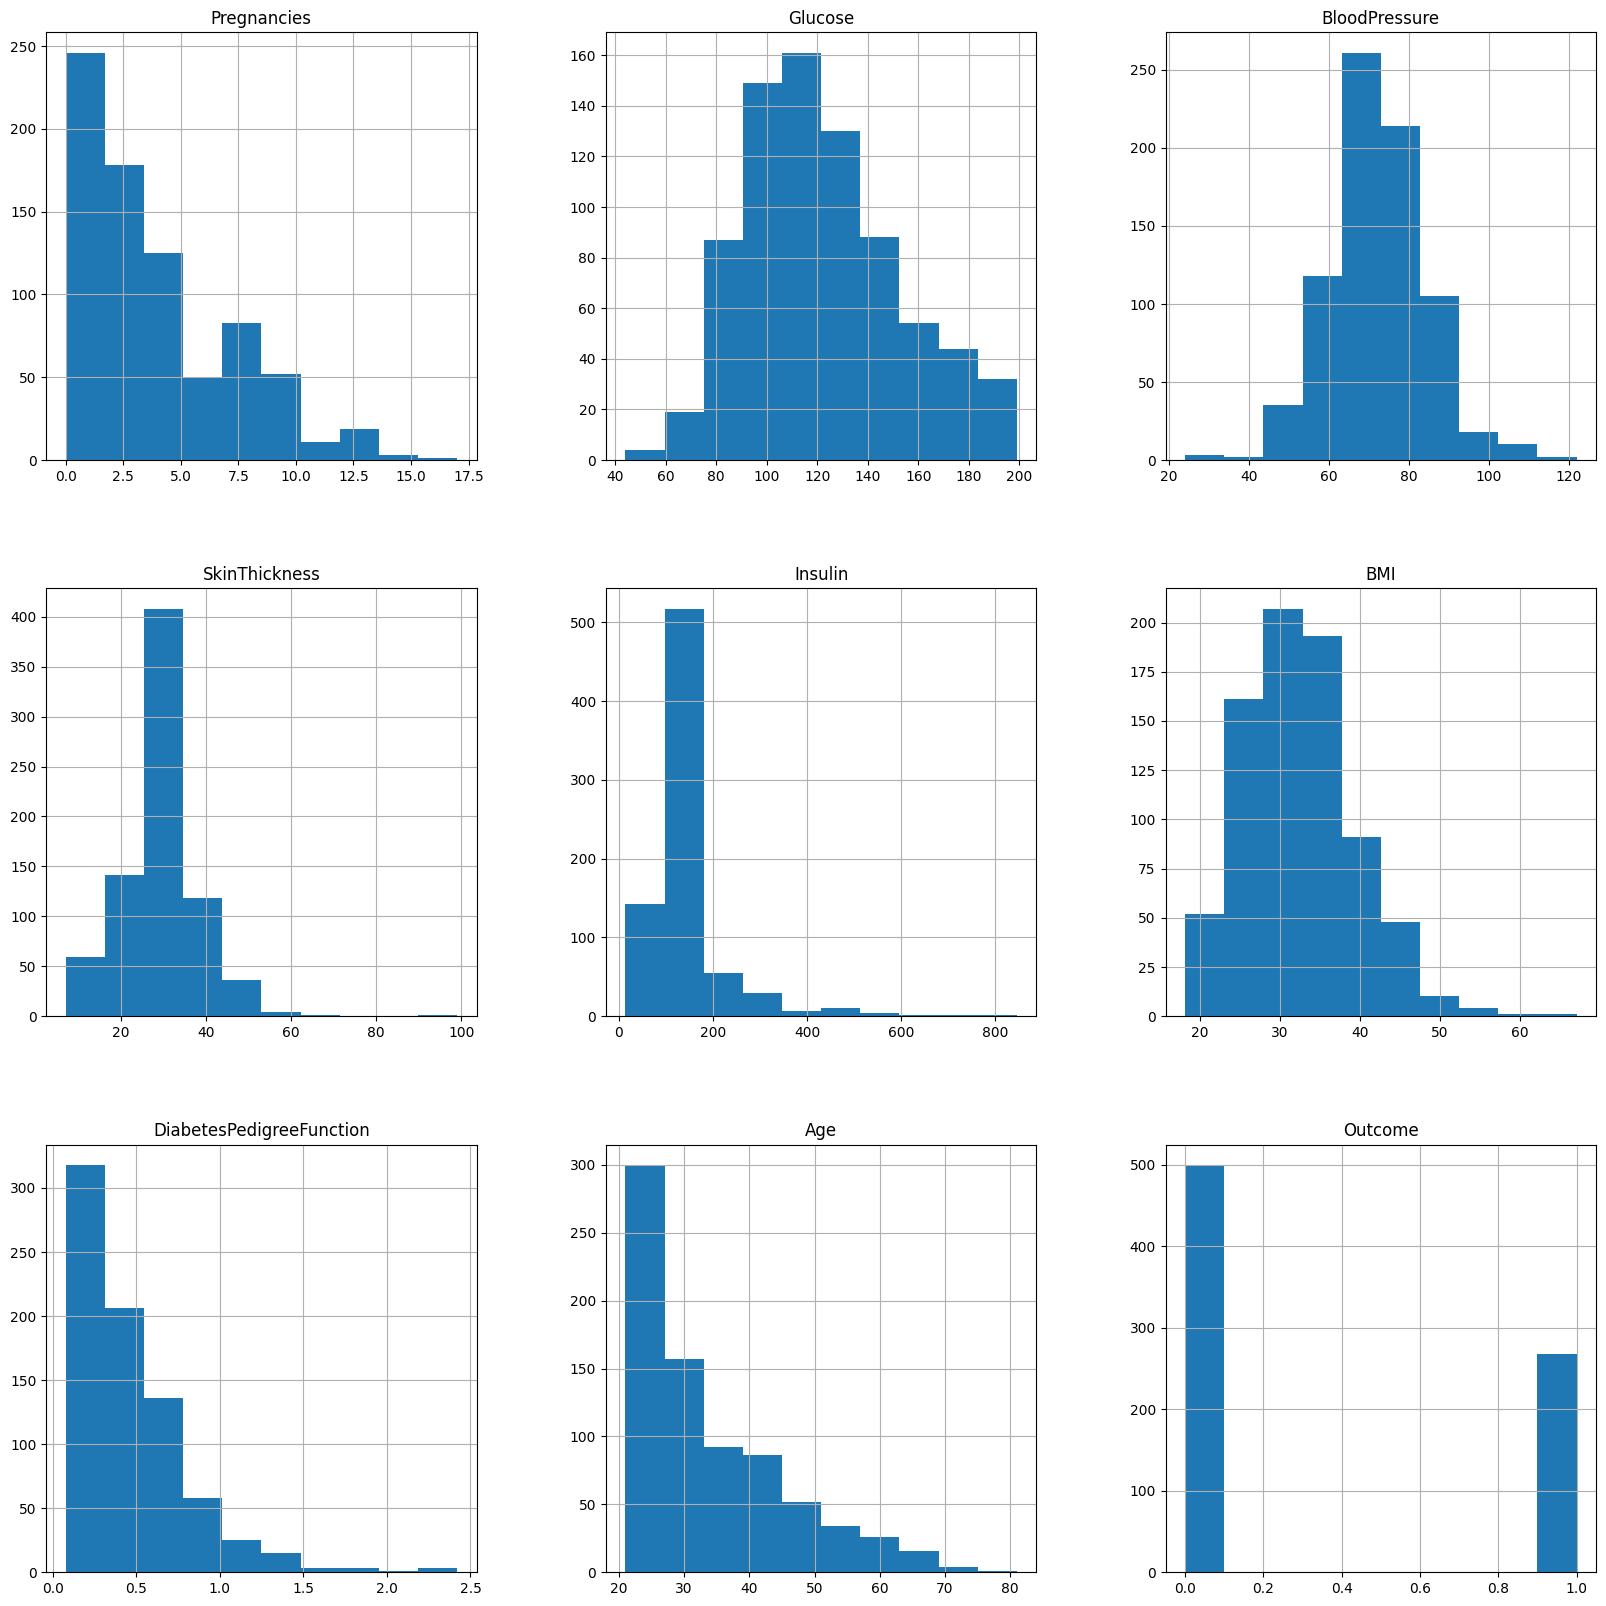

In [150]:
df_copy.hist(figsize= (20,20))

<Axes: xlabel='Outcome'>

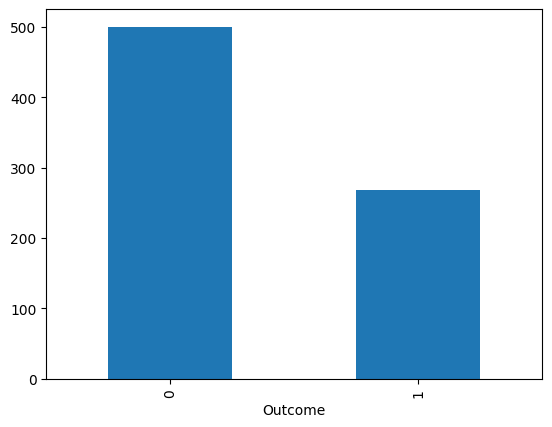

In [151]:
df.Outcome.value_counts().plot(kind= 'bar')

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

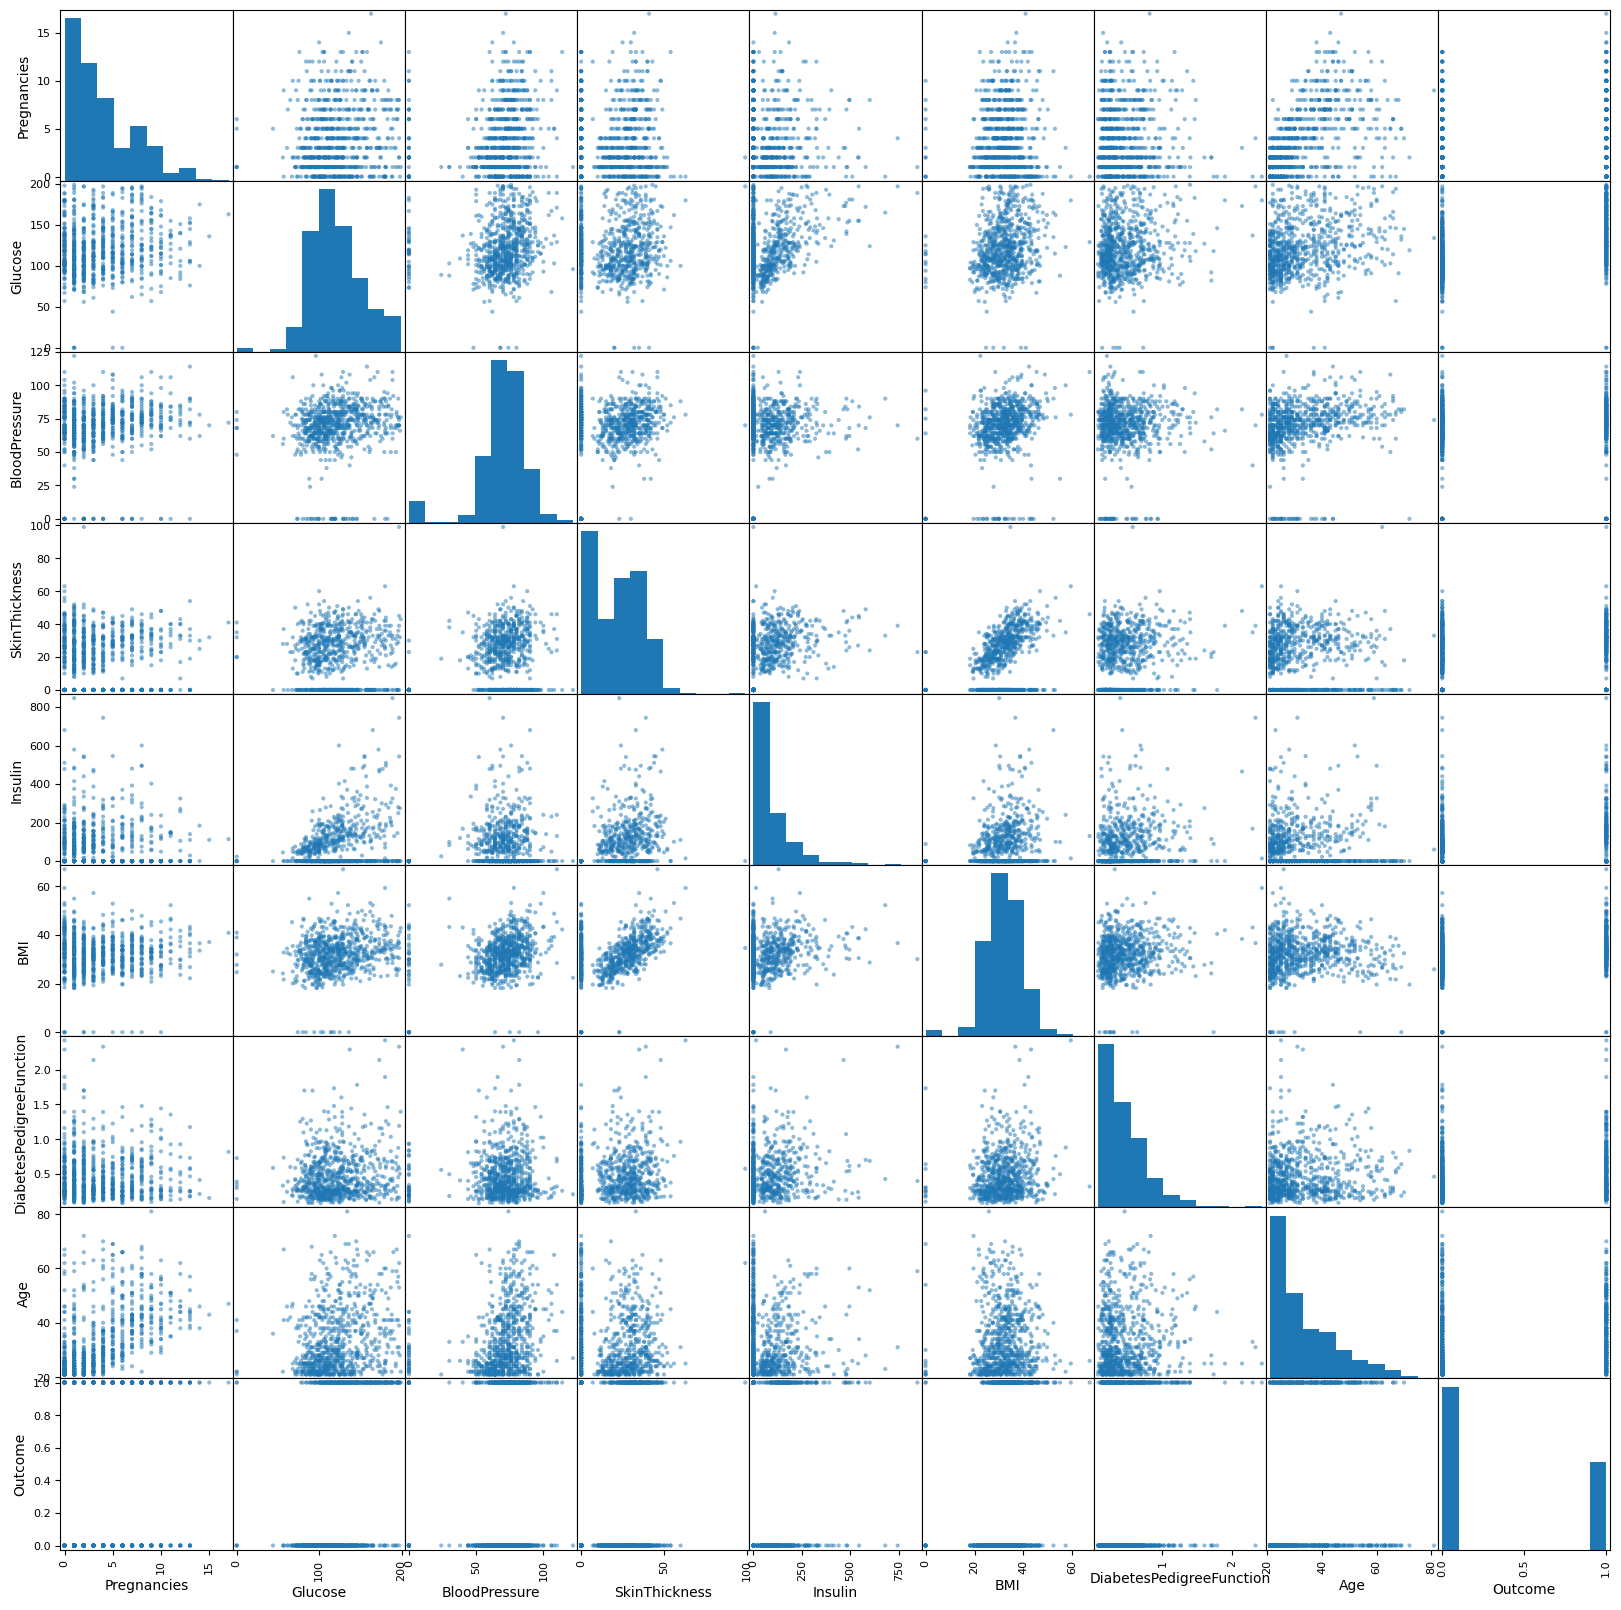

In [152]:
scatter_matrix(df, figsize=(20,20))

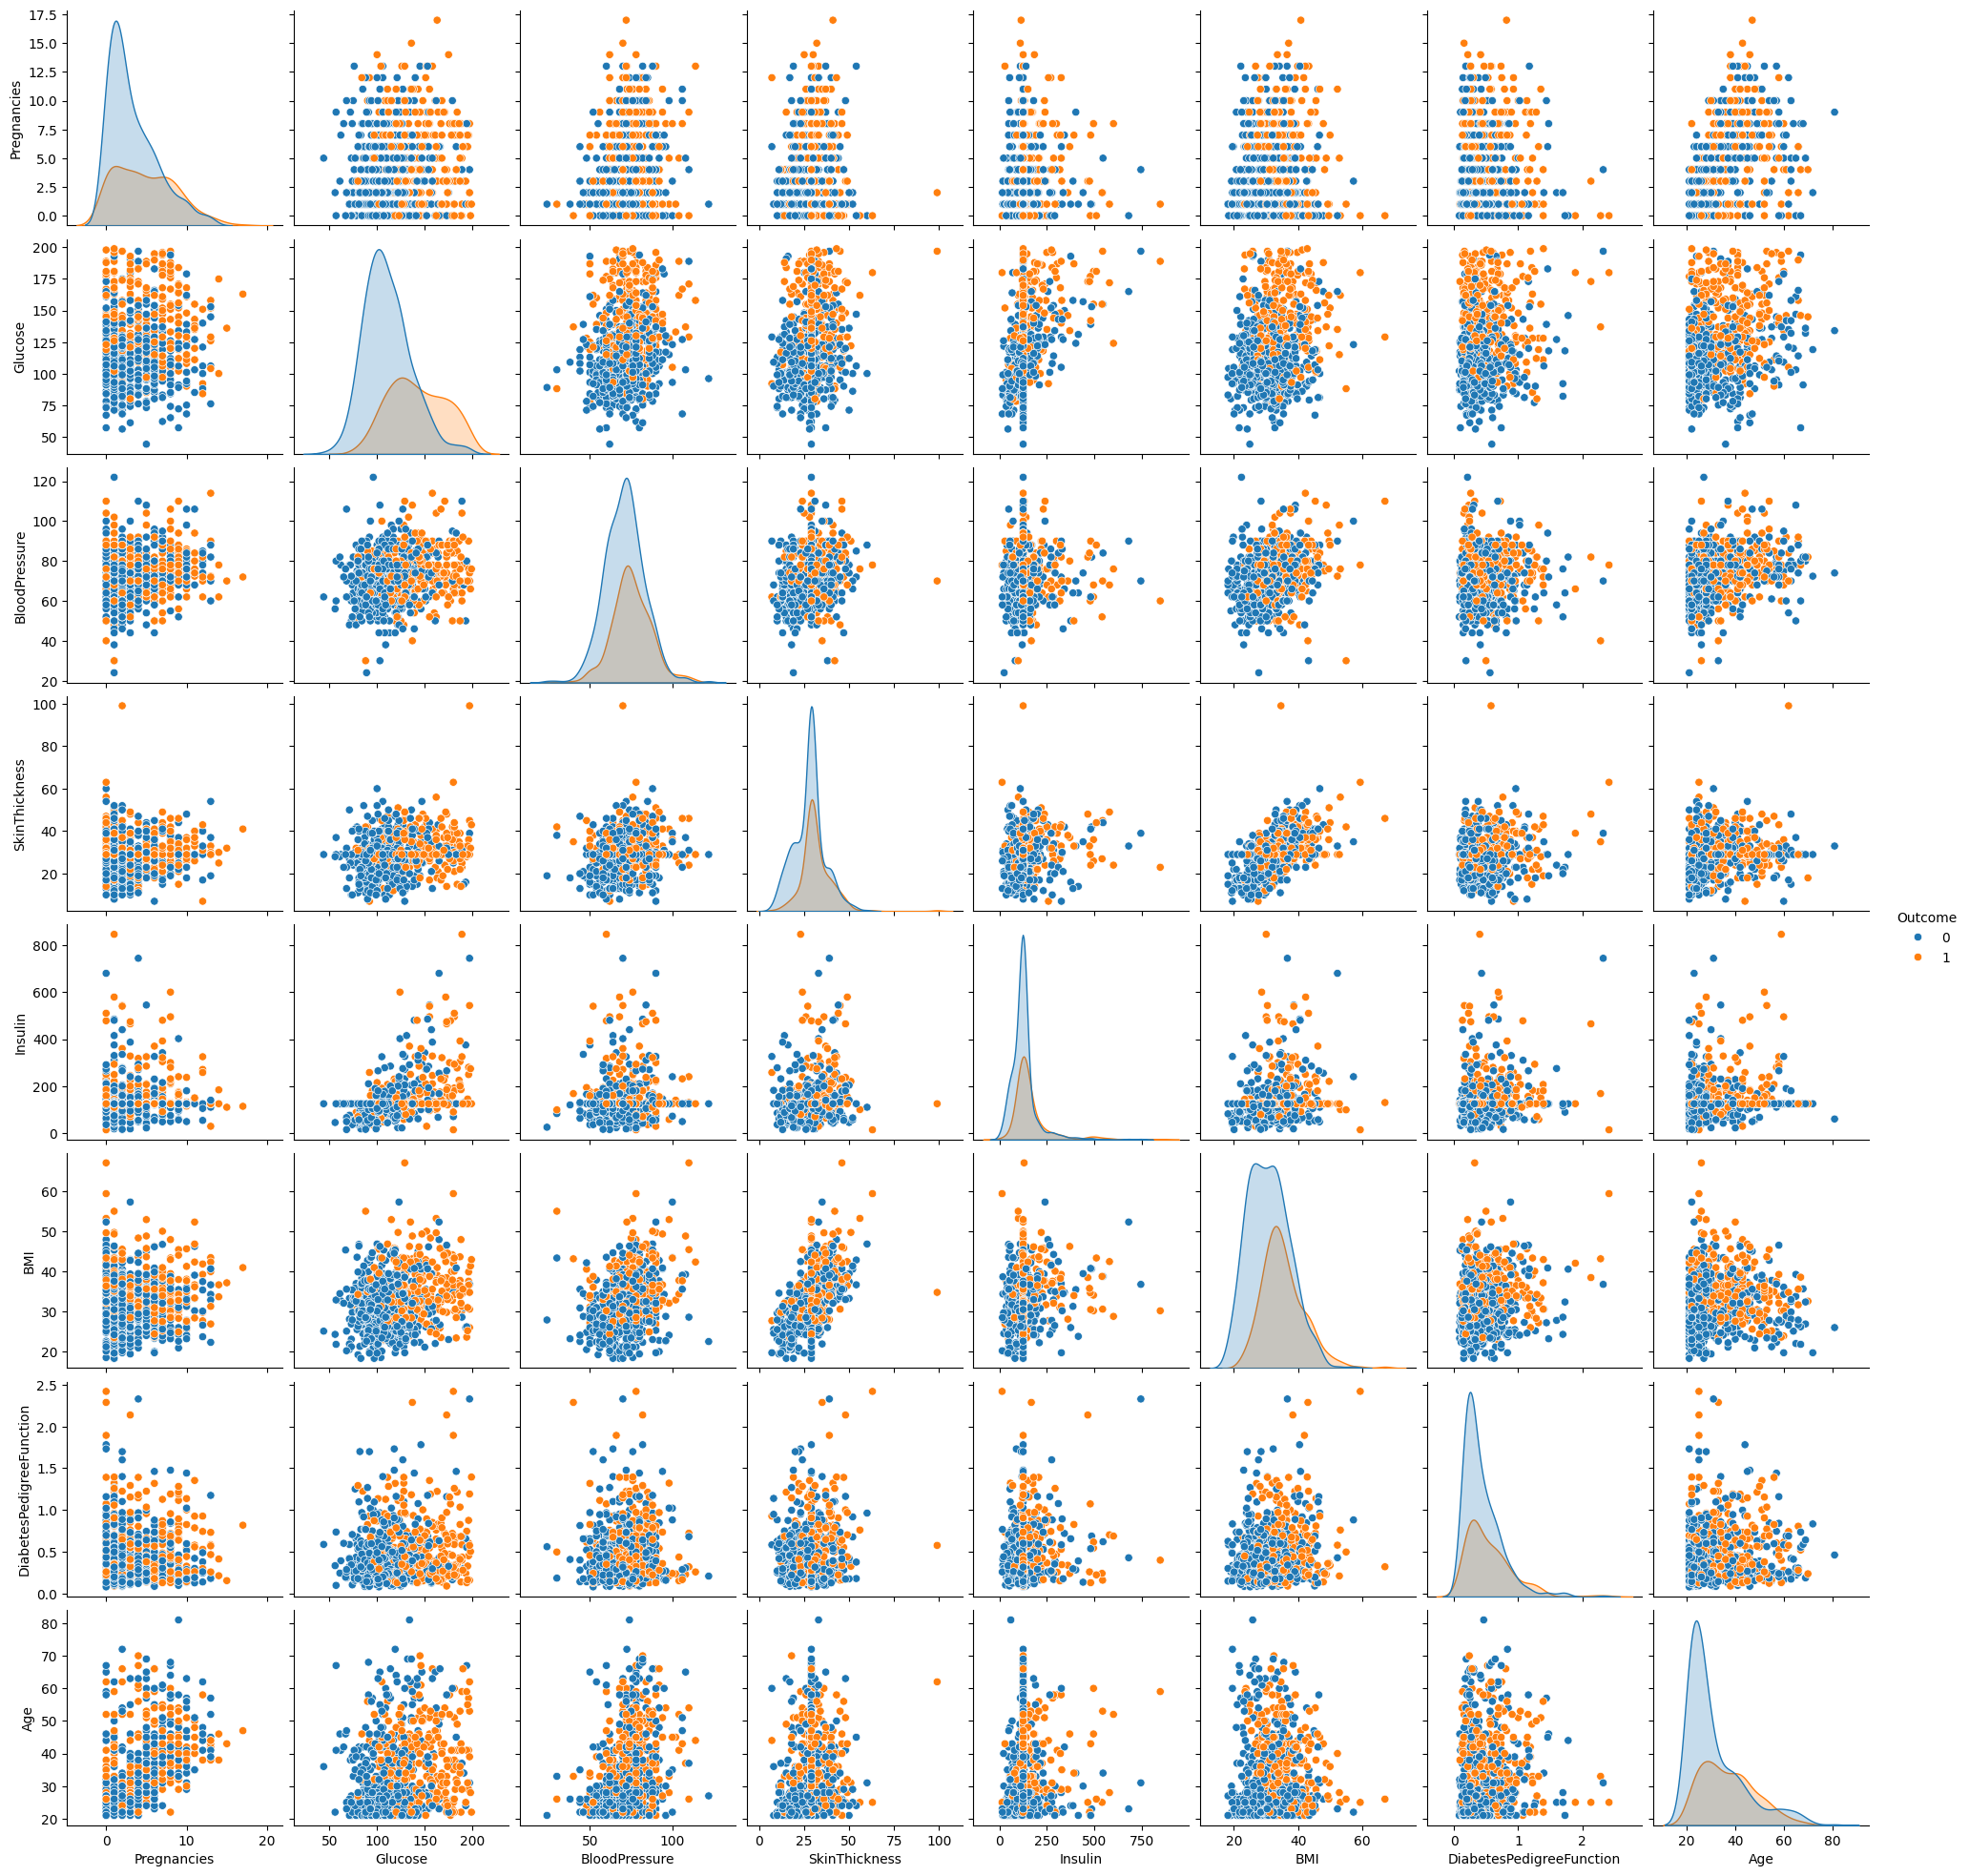

In [153]:
sns.pairplot(df_copy, hue= 'Outcome')

<Axes: >

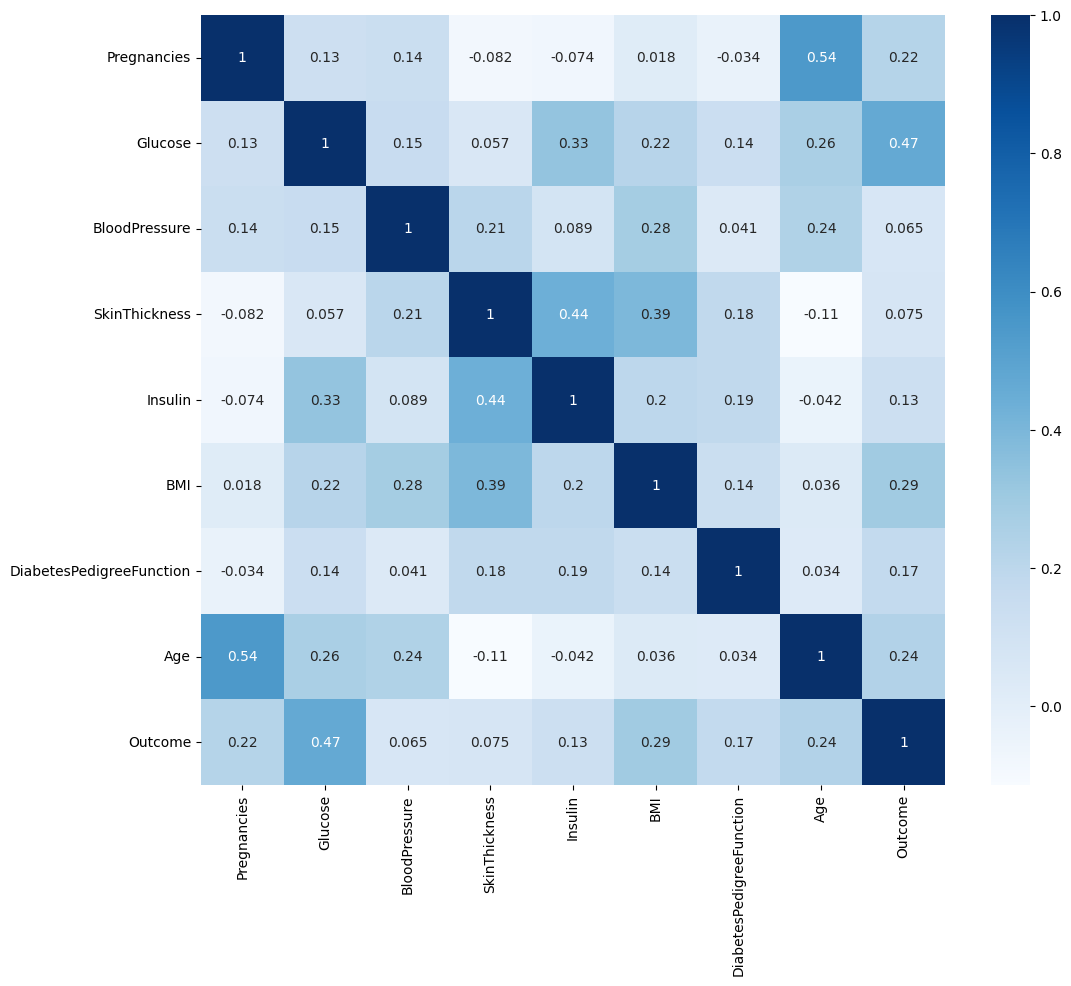

In [162]:
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(),
            annot= True,
            cmap= 'Blues')

<Axes: >

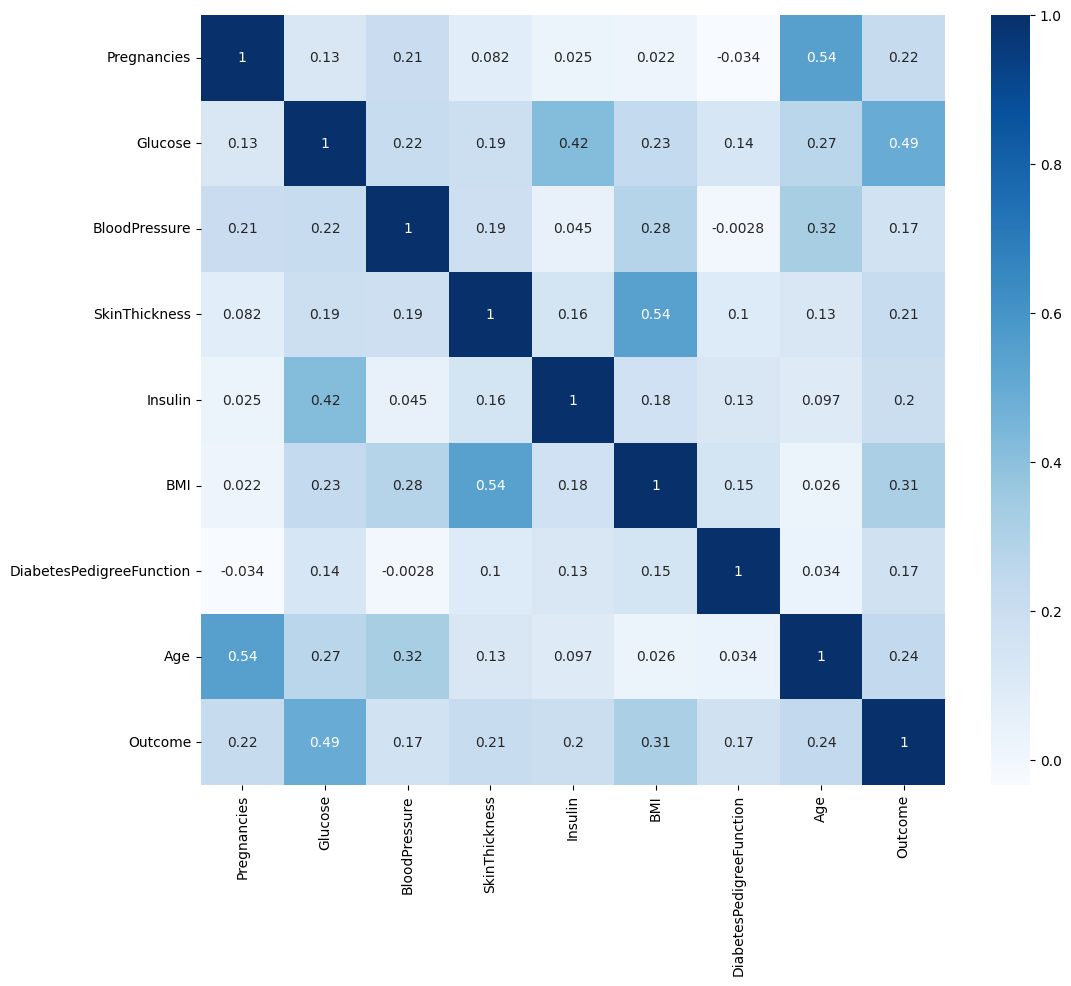

In [163]:
plt.figure(figsize= (12,10))
sns.heatmap(df_copy.corr(),
            annot= True,
            cmap= 'Blues')

In [164]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [165]:
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(df_copy.drop(['Outcome'], axis= 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df_copy.Outcome

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state= 42, stratify= y)

In [167]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, make_scorer

In [168]:
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [174]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(11)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print_scores(y_test, y_pred)
print(model.get_params())

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [183]:
param_grid = {
    'n_neighbors': np.arange(1,50),
}

grid_search = GridSearchCV(estimator= KNeighborsClassifier(),
                           param_grid= param_grid,
                           cv= 5,
                           )

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)
print(knn_model.get_params())

Best param:  {'n_neighbors': np.int64(14)}
Best score:  0.7871121264039596
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.66      0.48      0.56        89

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.68       256
weighted avg       0.73      0.73      0.72       256

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': np.int64(14), 'p': 2, 'weights': 'uniform'}
